# ребята непробиваемые! 
# Добро пожаловать в раздел ML! Дальше бога нет, есть только наивный прогноз... который лучше обученной модели


Начнем с импорта библиотек, датасета и прочей фигни

In [48]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [49]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии
    """

    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-100, 250000], [-100, 250000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-100, 250000], [-100, 250000])
    plt.title('Test set', fontsize=20)
    pass

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/ValeriyaTikhonovskaya/dz/main/model/ML_data.csv', sep = '\t')

## Делим выборку и начинаем учить учить простейшую линейную модель (классика)

In [51]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=43)

X_train, X_test = df_train.drop('желаемая з/п', axis=1), df_test.drop('желаемая з/п', axis=1)
y_train, y_test = df_train['желаемая з/п'], df_test['желаемая з/п']

In [52]:
y_mean = np.mean(y_test)
y_mean

73639.88333333333

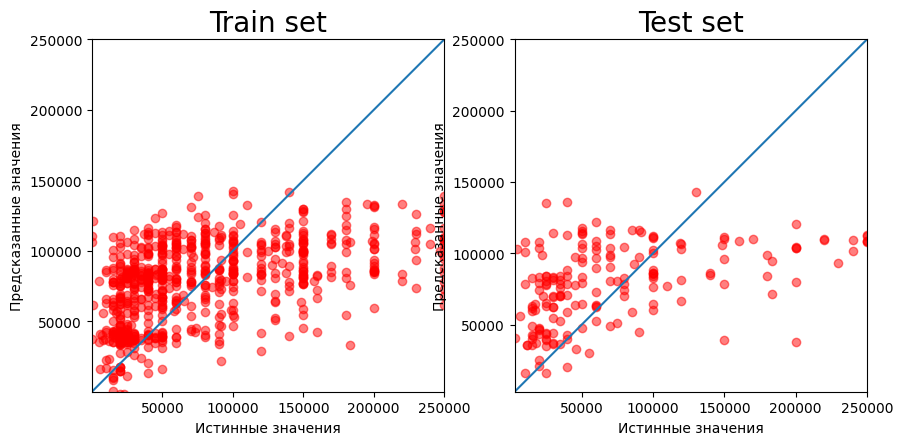

In [53]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)
y_pred_regr = model_regression.predict(X_test)
plot_yreal_ypred(y_test, y_train, y_pred_regr, model_regression.predict(X_train))

Прикольная штука у нас получилась, посчитаем ошибки что ли, благо их функции уже заимпортчены

In [54]:
print('Средняя абсолютная ошибка на наивных: ' ,MAE(y_test, y_mean * np.ones(y_test.shape[0])))

Средняя абсолютная ошибка на наивных:  49508.57314814814


In [55]:
print('Средняя абсолютная ошибка на регрессии: ', MAE(y_test, y_pred_regr))

Средняя абсолютная ошибка на регрессии:  44360.37058751861


**Ух ты, наша модель круче наивного прогноза! Но есть один нюанс...**

В рамках наших данных 44 000 ошибки конечно круче, чем 49 000, однако это непростительно много, поэтому надо что-то думать

## Поучим что-нибудь еще, например полиномиальное

Где-то в 20 веке, один дядя по фамилии Модильяни, сказал, что уровень дохода зависит от возраста квадратично. Го проверять

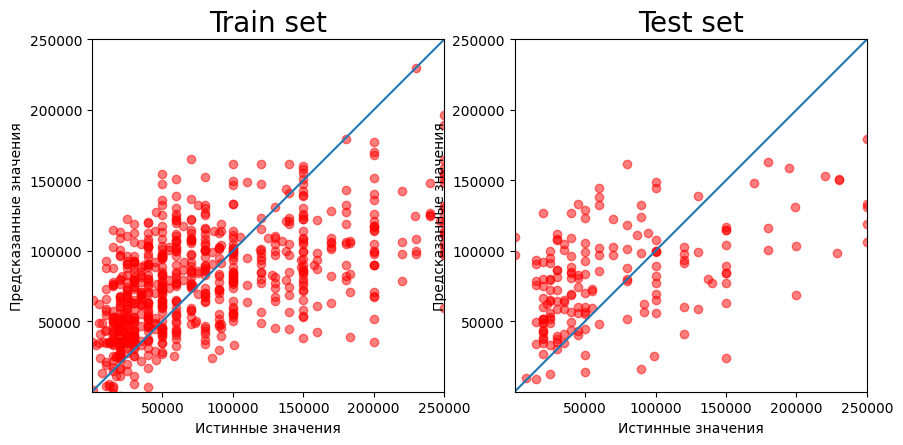

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df.drop('желаемая з/п', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X_poly, df['желаемая з/п'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plot_yreal_ypred(y_test, y_train, y_test_pred, y_train_pred)

In [57]:
print('Средняя абсолютная ошибка на наивных: ' ,MAE(y_test, y_mean * np.ones(y_test.shape[0])))

Средняя абсолютная ошибка на наивных:  48766.42018518518


In [58]:
print('Средняя абсолютная ошибка на наивных: ' ,MAE(y_test, y_test_pred))

Средняя абсолютная ошибка на наивных:  44169.57233422852


А тут уже что-то прям совсем все плохо, похоже дядя Модильяни был не прав(((

## Кластеризация

За кадром уже были перебраны более сложные модели вроде градиентного бустинга и случайного леса, но так как до дд осталось примерно 15 минут, а в этом коде не то что черт ногу сломит, а сам Сатана решит покончить с собой, переходим к самой норм части данного раздела по нашему мнению -- кластеризация. Будем использовать метод k-means, k-means++ для определение первоначальных центроид и методом локтя для определения оптимального значения количества центроид.

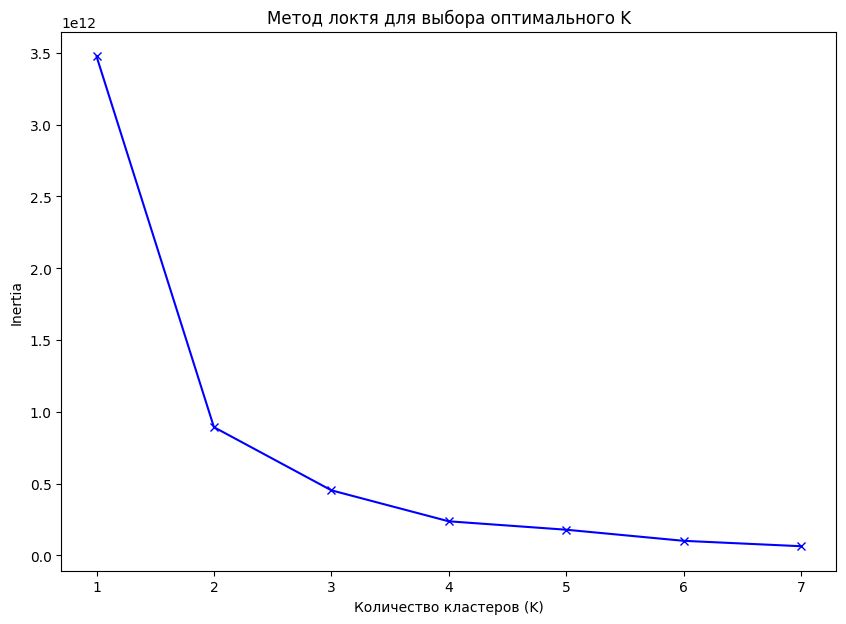

In [59]:
from sklearn.cluster import KMeans

k_range = range(1, 8)
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)
plt.figure(figsize=(10, 7))
plt.plot(k_range, inertia_values, 'bx-')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('Inertia')
plt.title('Метод локтя для выбора оптимального K')
plt.show()

Мы ребята верующие, поэтому сойдемся на том, что на рисунке видно, что наиболее оптимальное количество центроид будет **4**.

Также здесь используем модель PCA для уменьшения размерности

Inertia: 236760287018.73218
Silhouette Score: 0.5919792309325844
Calinski-Harabasz Index: 4086.5358266252397
Davies-Bouldin Index: 0.5201343459680523


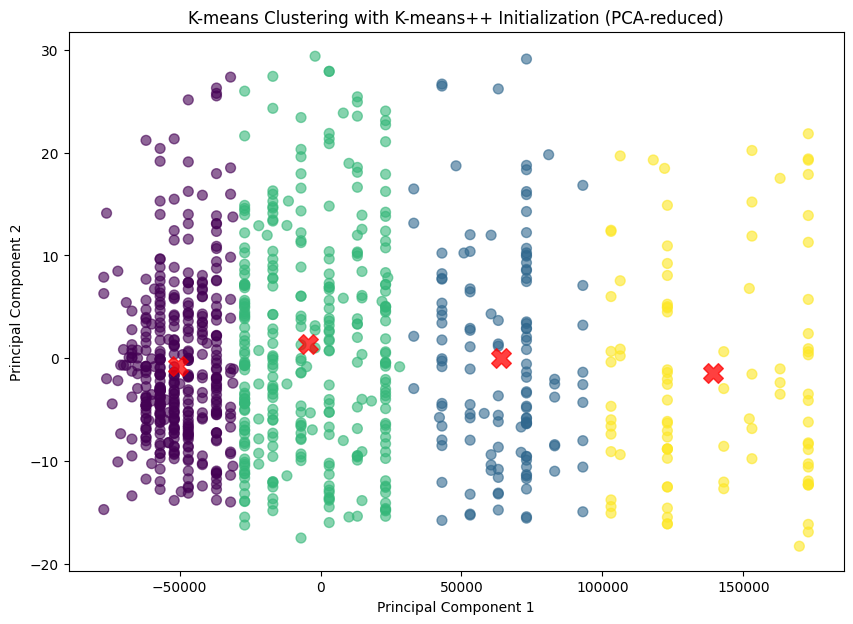

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
X = df.values
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, clusters)
calinski_harabasz = calinski_harabasz_score(X, clusters)
davies_bouldin = davies_bouldin_score(X, clusters)
print(f'Inertia: {inertia}')
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s=50, cmap='viridis', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering with K-means++ Initialization (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()